# Nama : Muhammad Dean Fahreza
# Kelas : 2IA09
# NPM : 50420812

<a id="1"></a>

# 1. Pengambilan Data:

## 1.1 Import packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

## 1.2 Import data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv")
data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


# 2. EDA

## 2.1.Univariate analysis
<a id="2"></a>

## 2.1.1.1 water

### **i.	Distribusi**

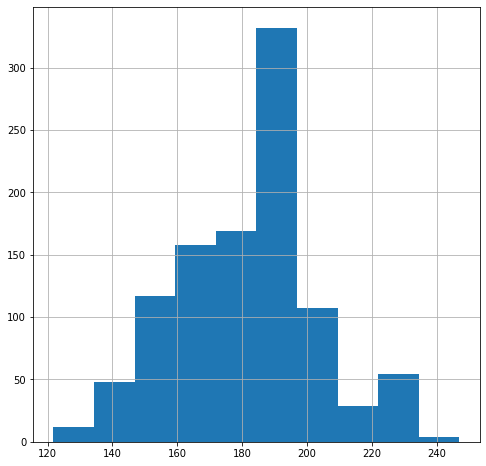

In [3]:
# Buat diagram di sini
data['water'].hist(figsize=(8,8))
plt.show()

In [4]:
data[data['water']>10].shape

(1030, 9)

### **ii.	Deskripsi**

Histogram di atas menjelaskan bahwa :
- attribut 'water' **simetris** 
- kurva tersebut seimbang, semakin ke kanan kurva nya naik, tetapi semakin ke kanan pula kurva nya cenderung menurun
- attribut 'water' paling rendah adalah `0` dan yang paling tinggi adalah `250`
- dataset ini memiliki lebih sedikit pengamatan (1030) tentang jenis 'water' orang setelah 'water' tertentu, yakni 10

## 2.1.1.2 age

In [5]:
# dikarenakan tiap-tiap attribut 'age' berbeda-beda, maka kita harus membuat grouping 
data['age-group'] = np.where(data["age"]> 30, ">30","<=30")

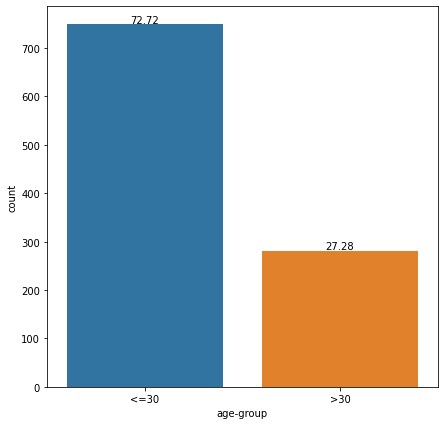

In [6]:
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="age-group", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### **ii.	Deskripsi**

Distribusi di atas menjelaskan bahwa :
* Dataset ini tidak seimbang, yaitu 27,28% di antaranya termasuk dalam kelompok age 1 (yang berumur lebih dari 30) dan 72,72% termasuk dalam kelompok age 0 (yang berumur kurang dari 30)

<a id="3"></a>
# 2.2.Bivariate analysis

## 2.2.1 water - age (Hubungan)

### i. **Boxplot**

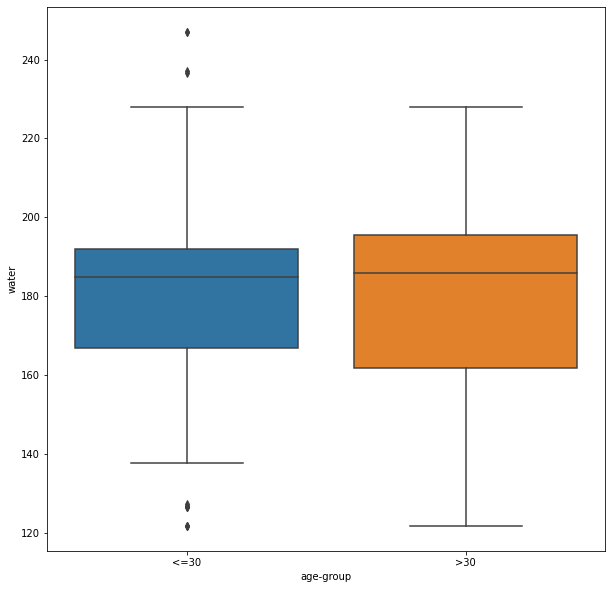

In [7]:
# Buat diagram di sini
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='age-group', y='water', data=data)
plt.show()

In [8]:
# menghitung mean
data[['age-group', 'water']].groupby(['age-group'], as_index=False).mean().sort_values(by='water', ascending=False)

,age-group,water
1,>30,182.826690
0,<=30,181.094793


In [9]:
# menghitung median
data[['age-group', 'water']].groupby(['age-group'], as_index=False).median().sort_values(by='water', ascending=False)

,age-group,water
1,>30,186.0
0,<=30,185.0


### ii. Deskripsi

- rata-rata 'water' untuk berumur `>30` adalah `182.826690` dan untuk berumur `<=30` adalah 181.094793
- nilai _median_ untuk berumur `>30` adalah `186.0` dan untuk berumur `<=30` adalah `185.0`

### iii. Uji Hipotesis
**Two sampled T-test** :-Uji Independent Samples t Test atau 2-sample t-test membandingkan rata-rata dua kelompok independen untuk menentukan apakah ada bukti statistik bahwa rata-rata populasi terkait berbeda secara signifikan.


Tentukan null dan alternate hypothesis.

    Secara umum, null hypothesis akan menyatakan bahwa kedua populasi yang diuji tidak memiliki perbedaan yang signifikan secara statistik.
    alternate hypothesis akan menyatakan bahwa ada perbedaan.

Dalam contoh ini kita dapat mengatakan bahwa:
- Null Hypothesis :- tidak ada perbedaan Rerata superplastic kelompok age >30 dan kelompok age <=30.
- Alternate Hypothesis :- ada perbedaan Rerata superplastic kelompok age >30 dan kelompok age <=30.

In [10]:
# Buat uji hipotesis untuk menentukan null atau alternate hypothesis
import random

data = data[(np.abs(stats.zscore(data["water"])) < 3)] 

income_1 = data[data['age-group']=="<=30"]['water']
income_0 = data[data['age-group']==">30"]['water']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0,100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1,100)

from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("null hypothesis ditolak")
else:
    print("null hypothesis diterima")

ttest -0.686940904054883
p value 0.4929954286424344
null hypothesis diterima


### iv. Kesimpulan akhir

Menggunakan analisis statistik,

Dapat disimpulkan bahwa terdapat perbedaan yang signifikan pada rerata water kelompok age >30 dan kelompok age <=30. Hal Ini membuktikan bahwa water memiliki peranan dalam membedakan kelompok age.